In [4]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
    
    
# con = PostgresConnection().getConnection()    

### Common Function to fetch Data from all tables 

In [6]:
#  select_stmt= is the SQL select query along with  table and column name    
def retrive_data_from_table(select_stmt): 
    con = PostgresConnection().getConnection()
    cur = con.cursor()
#     select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
#                   "FROM ecomdb_star_schema.trans_dim t"
    cur.execute(select_stmt)
    records = cur.fetchall()
    return records

###  Q8: What season(quarter) is the worst for each product item? As example,
#### item1-> q1
#### item2-> q2

In [11]:
select_query =  "select i.item_name, td.quarter, sum(f.quantity) "\
                "from ecomdb_star_schema.fact_table f "\
                "join ecomdb_star_schema.item_dim i on i.item_key=f.item_key "\
                "join ecomdb_star_schema.time_dim td on td.time_key = f.time_key "\
                "group by i.item_name, td.quarter "\
                "order by i.item_name, sum(f.total_price)"

record_Q6 = retrive_data_from_table(select_query)
df_Q9 = pd.DataFrame(list(record_Q6), columns=['Item', 'Quarter', 'Total Quantity'])
df_Q9 = df_Q9.groupby('Item').head(1)
df_Q9['Total Quantity'] = df_Q9['Total Quantity'].astype('int64')
df_Q9

successfully connected to database


,Item,Quarter,Total Quantity
0,100% Juice Box Variety 6.75 oz,Q1,5698
4,A&W Root Beer - 12 oz cans,Q2,5735
8,A&W Root Beer Diet - 12 oz cans,Q4,5589
12,Advil 2 pill packets,Q1,5453
16,All Purpose Cleaner 409 Spray,Q1,5325
...,...,...,...
1016,Welch's 100% Juice Variety10 oz,Q2,5494
1020,Wint O Green LifeSavers Sugar Free,Q1,5323
1024,Wonderful Pistachios (in shell),Q1,5578
1028,Yoplait Original Yogurt Variety Pack,Q1,5426


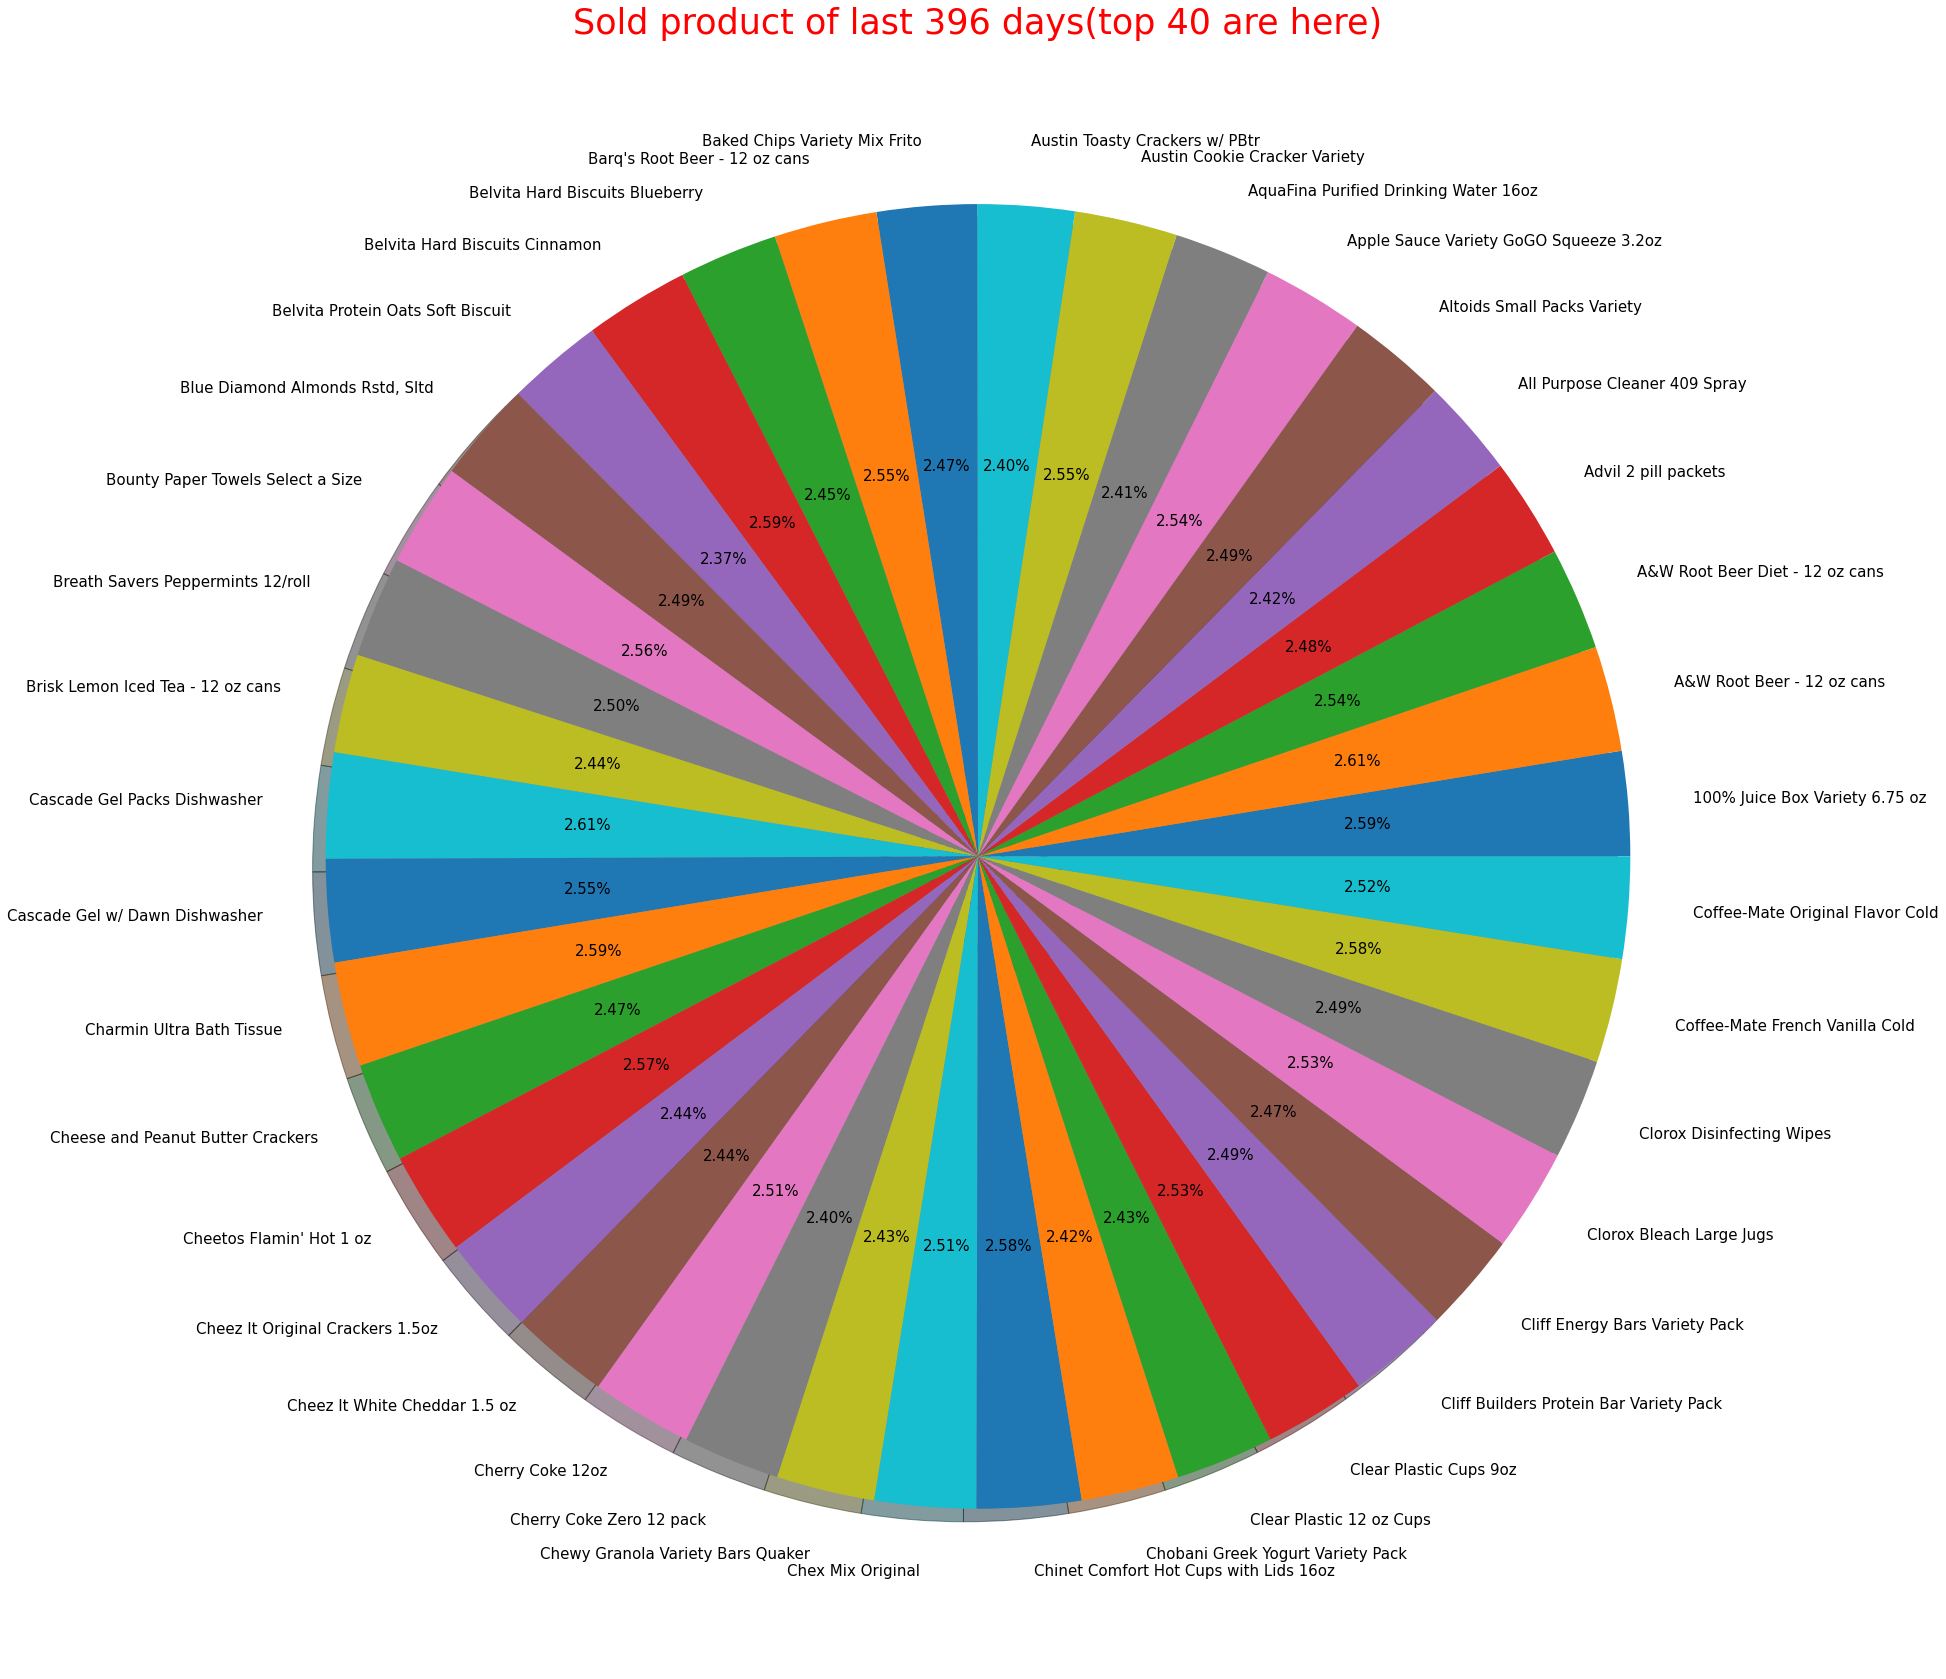

In [16]:
df_Q9 = df_Q9.head(40)

labels=df_Q9['Item']
data = df_Q9['Total Quantity']

textprops = {"fontsize":15}
plt.rcParams["figure.figsize"] = (30,30)

# explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1)
# colors=colors
# colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige",'salmon','palegreen','skyblue','plum','pink')
plt.title('Sold product of last 396 days(top 40 are here)',loc='center',color='r', size=35)

plt.pie(data, labels=labels, shadow = True, textprops = textprops, autopct='%.2f%%') 
plt.rcParams["figure.figsize"] = (30,30)
plt.show()


In [13]:
df_Q9.dtypes

Item              object
Quarter           object
Total Quantity     int64
dtype: object

In [15]:
df_Q9_Worst = df_Q9['Item'] + '(' +  df_Q9['Total Quantity'].astype('str') + '):' + '  ' + df_Q9['Quarter']
df_Q9_Worst

0             100% Juice Box Variety 6.75 oz (5698):  Q1
4                  A&W Root Beer - 12 oz cans(5735):  Q2
8             A&W Root Beer Diet - 12 oz cans(5589):  Q4
12                       Advil 2 pill packets(5453):  Q1
16              All Purpose Cleaner 409 Spray(5325):  Q1
20                Altoids Small Packs Variety(5466):  Q3
24     Apple Sauce Variety GoGO Squeeze 3.2oz(5585):  Q4
28      AquaFina Purified Drinking Water 16oz(5299):  Q1
32              Austin Cookie Cracker Variety(5597):  Q1
36             Austin Toasty Crackers w/ PBtr(5274):  Q2
40              Baked Chips Variety Mix Frito(5431):  Q2
44              Barq's Root Beer - 12 oz cans(5606):  Q3
48            Belvita Hard Biscuits Blueberry(5385):  Q4
52             Belvita Hard Biscuits Cinnamon(5700):  Q1
56          Belvita Protein Oats Soft Biscuit(5216):  Q3
60            Blue Diamond Almonds Rstd, Sltd(5474):  Q4
64         Bounty Paper Towels Select a Size (5637):  Q4
68         Breath Savers Pepper